## Surveillance Society - class 1

- Our data is logged through Google Location History: https://www.google.com/maps/timeline
- And exported using Google Checkout: https://takeout.google.com/settings/takeout

In [1]:
# Let's load it into a python dictionary

import json

floc = 'data/'
fname = 'gilad.json'

j = json.loads(open(floc+fname, 'r').read())

In [3]:
print 'number of entries:',len(j['locations'])

number of entries: 13151


In [4]:
# different fields are filled at different points in time

for i in range(10):

    for k,v in j['locations'][i].items():
        print k,v
        
    print ''


latitudeE7 407431000
altitude 18
longitudeE7 -739922309
timestampMs 1478481728496
verticalAccuracy 10
accuracy 65

latitudeE7 407434000
accuracy 74
longitudeE7 -739920578
timestampMs 1478481502723

latitudeE7 407453367
accuracy 53
longitudeE7 -739910078
timestampMs 1478481445723

latitudeE7 407453367
accuracy 58
longitudeE7 -739910078
timestampMs 1478481023723

latitudeE7 407433845
accuracy 59
longitudeE7 -739921026
timestampMs 1478480921723

latitudeE7 407430858
altitude 18
longitudeE7 -739923078
timestampMs 1478480247445
verticalAccuracy 10
accuracy 65

latitudeE7 407438930
altitude 17
longitudeE7 -739918018
timestampMs 1478478796841
verticalAccuracy 10
accuracy 73

latitudeE7 407444887
altitude 17
longitudeE7 -739914572
timestampMs 1478474592268
verticalAccuracy 10
accuracy 155

latitudeE7 407429484
altitude 19
longitudeE7 -739923831
timestampMs 1478473866247
verticalAccuracy 10
accuracy 65

latitudeE7 407431406
accuracy 91
longitudeE7 -739922751
timestampMs 1478473858594



## Pandas Dataframe

In [5]:
import pandas as pd

df = pd.DataFrame.from_dict(j['locations'])
print('There are %s rows' % len(df))

There are 13151 rows


In [6]:
df.head()

,accuracy,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy
0,65,18.0,NaN,407431000,-739922309,1478481728496,NaN,10.0
1,74,NaN,NaN,407434000,-739920578,1478481502723,NaN,NaN
2,53,NaN,NaN,407453367,-739910078,1478481445723,NaN,NaN
3,58,NaN,NaN,407453367,-739910078,1478481023723,NaN,NaN
4,59,NaN,NaN,407433845,-739921026,1478480921723,NaN,NaN


In [7]:
df.fillna(0).head()

,accuracy,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy
0,65,18.0,0.0,407431000,-739922309,1478481728496,0.0,10.0
1,74,0.0,0.0,407434000,-739920578,1478481502723,0.0,0.0
2,53,0.0,0.0,407453367,-739910078,1478481445723,0.0,0.0
3,58,0.0,0.0,407453367,-739910078,1478481023723,0.0,0.0
4,59,0.0,0.0,407433845,-739921026,1478480921723,0.0,0.0


In [8]:
# convert lat, lon to decimalized degrees

df['lat'] = df['latitudeE7'] / 10.**7
df['lon'] = df['longitudeE7'] / 10.**7
df.head()

,accuracy,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy,lat,lon
0,65,18.0,NaN,407431000,-739922309,1478481728496,NaN,10.0,40.743100,-73.992231
1,74,NaN,NaN,407434000,-739920578,1478481502723,NaN,NaN,40.743400,-73.992058
2,53,NaN,NaN,407453367,-739910078,1478481445723,NaN,NaN,40.745337,-73.991008
3,58,NaN,NaN,407453367,-739910078,1478481023723,NaN,NaN,40.745337,-73.991008
4,59,NaN,NaN,407433845,-739921026,1478480921723,NaN,NaN,40.743384,-73.992103


## Exploring our data

Populating the interactive namespace from numpy and matplotlib


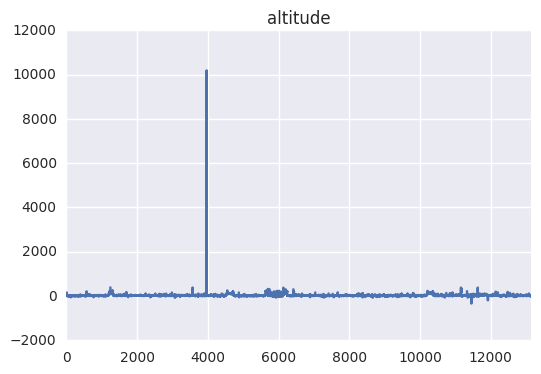

In [24]:
%pylab inline

df.altitude.plot()
title('altitude')

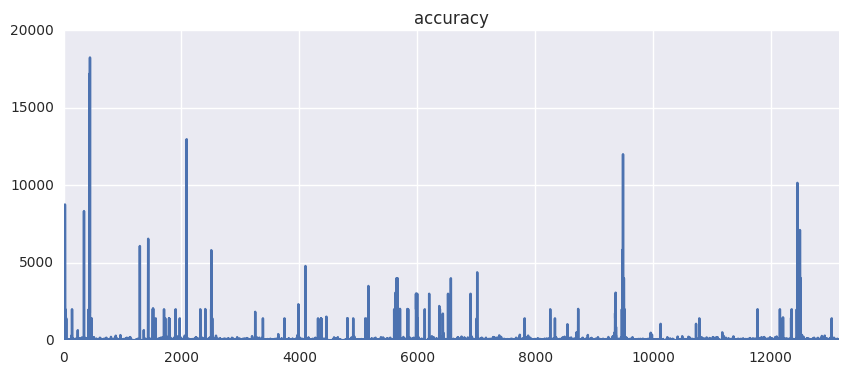

In [26]:
# we can use the seaborn library for prettier plotting (many more examples here - http://seaborn.pydata.org/)
import seaborn as sns
sns.set(color_codes=True)

df.accuracy.plot(figsize=(10,4))
title('accuracy')

In [11]:
df.accuracy[:15]

0       65
1       74
2       53
3       58
4       59
5       65
6       73
7      155
8       65
9       91
10      10
11    1427
12      30
13    2896
14      10
Name: accuracy, dtype: int64

In [12]:
# Let's try to understand the underlying data here
print 'N:', len(df.accuracy)
print 'mean:',df.accuracy.mean()
print 'median:',df.accuracy.median()
print 'mode:',df.accuracy.mode()
print 'std:',df.accuracy.std()
print 'max:',df.accuracy.max()
print 'min:',df.accuracy.min()

N: 13151
mean: 78.4939548323
median: 13.0
mode: 0    10
dtype: int64
std: 486.71500138
max: 18242
min: 2


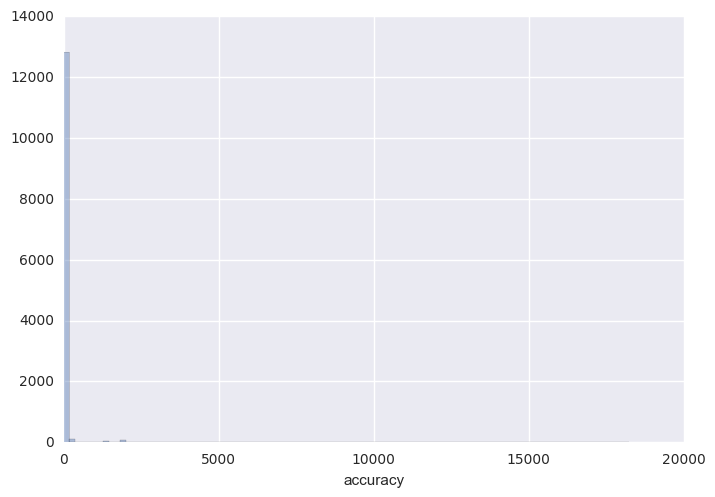

In [13]:
# here's a historgram of this data -> what kind of distribution is this?

sns.distplot(df.accuracy, bins=100, kde=False) # <- try changing the number of bins in the histogram
#df.accuracy.hist() # --> similar way to plot a histogram

A histogram is a graphical representation of the distribution of data. It is an estimate of the probability distribution of a continuous variable (quantitative variable) and was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

In [14]:
# now let's only look at values under 1000
df_accuracy = df[[x<1000 for x in df.accuracy]].accuracy

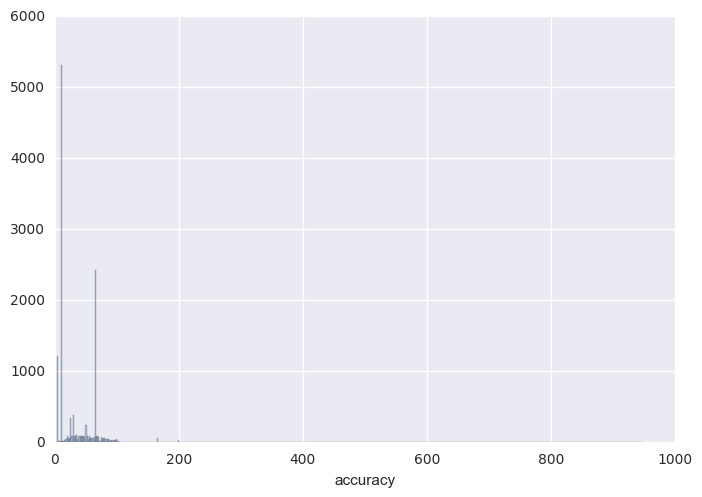

In [15]:
sns.distplot(df_accuracy, bins=500, kde=False)

- Multi-modal distribution (bimodal): continuous distribution with two different modes
- Why with mobile data? Perhaps the nature of triangulation..?

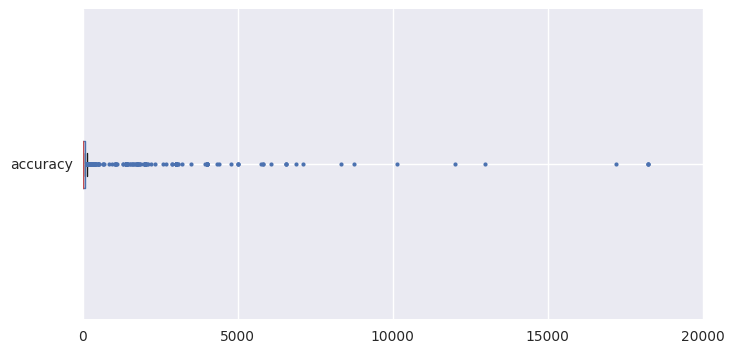

In [16]:
# Box Plot (a.k.a. - cat and whiskers plot)

df.accuracy.plot(kind='box', vert=False, sym='k.', figsize=(8,4))

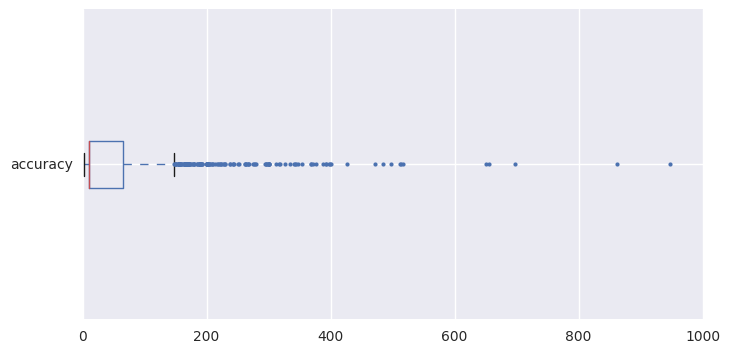

In [17]:
df_accuracy.plot(kind='box', vert=False, sym='k.', figsize=(8,4))

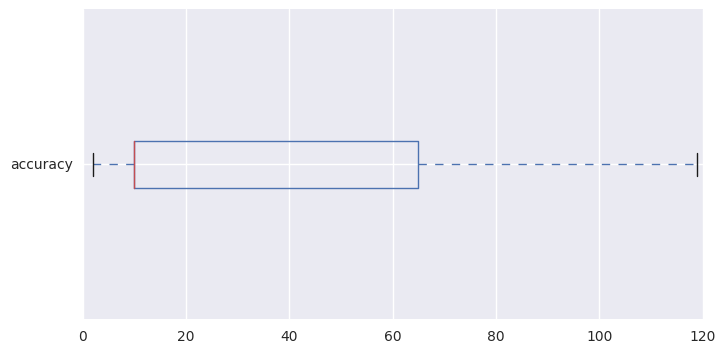

In [18]:
df[[x<120 for x in df.accuracy]].accuracy.plot(kind='box', vert=False, sym='k.', figsize=(8,4))

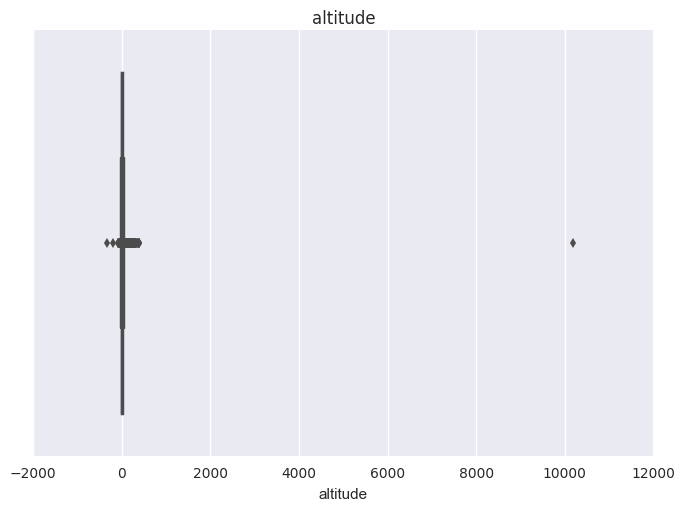

In [19]:
sns.boxplot(df.altitude)
title('altitude')

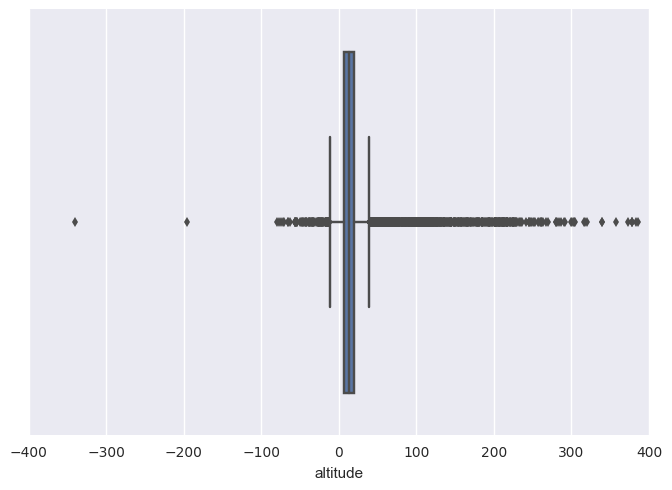

In [20]:
# remove the outlier
sns.boxplot(df.altitude[[x<10000 for x in df.altitude]])

In [33]:
df.corr()

,accuracy,altitude,heading,latitudeE7,longitudeE7,velocity,verticalAccuracy,lat,lon
accuracy,1.000000,0.007437,0.040739,0.037587,0.026195,-0.081820,0.139957,0.037587,0.026195
altitude,0.007437,1.000000,0.033608,0.006219,0.076272,0.143632,0.316018,0.006219,0.076272
heading,0.040739,0.033608,1.000000,0.062853,0.039352,0.053553,0.035028,0.062853,0.039352
latitudeE7,0.037587,0.006219,0.062853,1.000000,0.255318,0.046329,-0.071921,1.000000,0.255318
longitudeE7,0.026195,0.076272,0.039352,0.255318,1.000000,0.075740,0.083024,0.255318,1.000000
velocity,-0.081820,0.143632,0.053553,0.046329,0.075740,1.000000,-0.006151,0.046329,0.075740
verticalAccuracy,0.139957,0.316018,0.035028,-0.071921,0.083024,-0.006151,1.000000,-0.071921,0.083024
lat,0.037587,0.006219,0.062853,1.000000,0.255318,0.046329,-0.071921,1.000000,0.255318
lon,0.026195,0.076272,0.039352,0.255318,1.000000,0.075740,0.083024,0.255318,1.000000


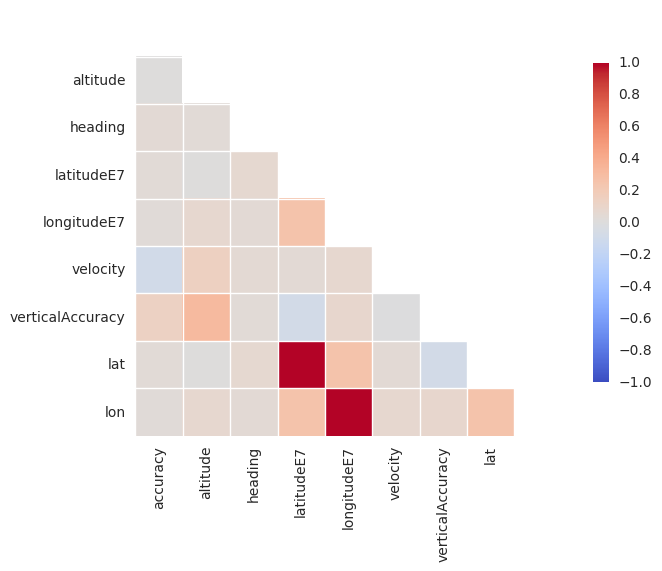

In [39]:
from seaborn.linearmodels import corrplot

corrplot(df, annot=False, diag_names=False)

### Pickle the data

In [40]:
import pickle

pickle.dump(df, open('ssoc_df_1.p','wb'))

### Google APIs

Instructions to set up a google API key:
- https://console.developers.google.com/apis/dashboard

- need to enable the Google Maps JavaScript API under APIs in the Google API Console
    - https://console.developers.google.com/apis/api/maps_backend/overview?project=genuine-cirrus-115405


### Visualize on a map

In [41]:
# pip install gmaps
import gmaps
import gmaps.datasets

api_key = ''

# insert Google API key
gmaps.configure(api_key=api_key)

In [42]:
# array of (latitude, longitude) pairs
data = [(v.lat,v.lon) for k,v in df.iterrows()]

In [43]:
# instantiate a gmaps object
m = gmaps.Map()

# add a layer (heatmap) to it using our data
heatmap_layer = gmaps.Heatmap(data=data)
heatmap_layer.gradient = ['white', 'red']
heatmap_layer.point_radius = 3
heatmap_layer.max_intensity = 2
m.add_layer(heatmap_layer)

m

## Questions

1. Describe the data fields - collected by the phone
    - Why are some filled at times and others not?
    - Why are there times when there are more data entries?
    - What do the 'heading' or 'VerticalAccuracy' fields represent?
2. Where do you observe outliers?
    - Describe the outlier. What was your target doing?
    - What is noise that you need to filter out, and how do you go about making that choice?
3. Describe the top locations of your target. 
    - Can you identify home vs. work? Use a plot/map to show.
    - Share a screenshot of this map in our shared slack channel.
4. Use external data sources to describe the top areas visited by your target in terms of demographics, average income, race, and any other salient information you think is important.